In [248]:
import pandas as pd
import numpy as np

month = [f"{year}{month:02d}" for year in range(2005, 2011) for month in range(1, 13)]
month = [m for m in month if m <= "201011"]

dataframes = []
generic_path = "/Users/andreachecchi/Documents/Cours 4A Centrale/Projet Data/Donnees-Meteo/"

for month_str in month:
    file = f"{generic_path}synop.{month_str}.csv.gz"
    try:
        df = pd.read_csv(file, sep=";", compression="gzip")
        dataframes.append(df)
    except FileNotFoundError:
        print(f"Missing file: {file}")


df_meteo = pd.concat(dataframes, ignore_index=True)

df_museum = pd.read_excel("/Users/andreachecchi/Documents/Cours 4A Centrale/Projet Data/Data-Musée.xlsx")

df_museum


Missing file: /Users/andreachecchi/Documents/Cours 4A Centrale/Projet Data/Donnees-Meteo/synop.200801.csv.gz
Missing file: /Users/andreachecchi/Documents/Cours 4A Centrale/Projet Data/Donnees-Meteo/synop.200802.csv.gz
Missing file: /Users/andreachecchi/Documents/Cours 4A Centrale/Projet Data/Donnees-Meteo/synop.200803.csv.gz
Missing file: /Users/andreachecchi/Documents/Cours 4A Centrale/Projet Data/Donnees-Meteo/synop.200804.csv.gz


,Jour,Date,Fréquentation
0,dimanche,2005-01-02,2150
1,lundi,2005-01-03,662
2,mardi,2005-01-04,0
3,mercredi,2005-01-05,900
4,jeudi,2005-01-06,734
...,...,...,...
2016,vendredi,2010-11-26,643
2017,samedi,2010-11-27,733
2018,dimanche,2010-11-28,729
2019,lundi,2010-11-29,507


In [249]:
df_meteo.to_csv("df_meteo.csv", index=False)
df_museum.to_csv("df_museum.csv", index=False)

In [250]:
df_meteo

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,Unnamed: 59
0,7005,20050101000000,102760,40,1,260,3.100000,281.250000,280.450000,95,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
1,7015,20050101000000,102660,80,3,270,2.100000,280.650000,279.550000,93,...,7,6,1380,mq,mq,mq,mq,mq,mq,NaN
2,7020,20050101000000,102840,-10,5,240,2.100000,283.550000,280.450000,81,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
3,7027,20050101000000,102900,0,0,240,3.100000,282.250000,281.350000,94,...,7,6,1020,mq,mq,mq,mq,mq,mq,NaN
4,7037,20050101000000,102870,30,0,240,3.100000,279.450000,279.050000,97,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951764,81401,20101130210000,100650,mq,mq,10,1.500000,302.350000,297.250000,74,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
951765,81405,20101130210000,100730,mq,mq,80,4.100000,301.750000,296.850000,75,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
951766,81408,20101130210000,100700,mq,mq,110,3.600000,302.850000,292.550000,54,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
951767,81415,20101130210000,100650,mq,mq,140,0.500000,304.350000,295.150000,58,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN


In [251]:
df_meteo_clean = df_meteo.drop(columns=["pmer","tend","cod_tend","dd","td","u","vv","ww","w1","w2",
                        "nbas","hbas","cl","cm","ch","niv_bar","geop","tend24","tminsol","sw","tw",
                        "raf10","per","etat_sol","ssfrai","perssfrai","phenspe1","phenspe2","phenspe3",
                        "phenspe3","phenspe4","nnuage1","nnuage2","nnuage3","nnuage4","ctype1","ctype2",
                        "ctype3","ctype4","hnuage1","hnuage2","hnuage3","hnuage4","Unnamed: 59","pres",
                        "n","tn24","tx24","rr3","rr6","rr24","ht_neige"])
df_meteo_clean

,numer_sta,date,ff,t,tn12,tx12,rafper,rr1,rr12
0,7005,20050101000000,3.100000,281.250000,mq,mq,5.100000,0.000000,mq
1,7015,20050101000000,2.100000,280.650000,mq,mq,4.100000,0.000000,mq
2,7020,20050101000000,2.100000,283.550000,mq,mq,mq,mq,mq
3,7027,20050101000000,3.100000,282.250000,mq,mq,5.100000,0.000000,mq
4,7037,20050101000000,3.100000,279.450000,mq,mq,4.100000,0.000000,mq
...,...,...,...,...,...,...,...,...,...
951764,81401,20101130210000,1.500000,302.350000,mq,mq,mq,mq,mq
951765,81405,20101130210000,4.100000,301.750000,mq,mq,mq,mq,mq
951766,81408,20101130210000,3.600000,302.850000,mq,mq,mq,mq,mq
951767,81415,20101130210000,0.500000,304.350000,mq,mq,mq,mq,mq


In [252]:
df_meteo_clean.dtypes

numer_sta     int64
date          int64
ff           object
t            object
tn12         object
tx12         object
rafper       object
rr1          object
rr12         object
dtype: object

In [253]:
df_meteo_clean = df_meteo_clean[df_meteo_clean["numer_sta"] == 7149] #Orly weather monitoring station chosen

#Date and Time manipulation and conversion 
df_meteo_clean["date"] = df_meteo_clean["date"].astype(str).str[:-4]
df_meteo_clean = df_meteo_clean[df_meteo_clean["date"].str[-2:].isin(['09', '12', '15', '18', '21'])] #Only day-time data taken into account

df_meteo_clean

/var/folders/5w/x0658ths0qgg_mrds4w2c5qw0000gn/T/ipykernel_25355/3364928739.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meteo_clean["date"] = df_meteo_clean["date"].astype(str).str[:-4]


,numer_sta,date,ff,t,tn12,tx12,rafper,rr1,rr12
187,7149,2005010109,3.100000,280.650000,mq,mq,5.100000,0.000000,mq
246,7149,2005010112,3.100000,283.350000,mq,mq,7.200000,0.000000,mq
306,7149,2005010115,4.100000,284.450000,mq,mq,7.200000,0.000000,mq
365,7149,2005010118,6.200000,284.650000,279.250000,285.150000,9.800000,0.000000,0.200000
424,7149,2005010121,8.700000,284.850000,mq,mq,13.900000,0.000000,mq
...,...,...,...,...,...,...,...,...,...
951483,7149,2010113009,2.600000,268.350000,mq,mq,4.100000,0.000000,mq
951542,7149,2010113012,4.600000,271.650000,mq,mq,6.200000,0.000000,mq
951601,7149,2010113015,5.100000,272.150000,mq,mq,8.700000,0.000000,mq
951660,7149,2010113018,6.200000,271.350000,268.350000,272.550000,9.300000,0.000000,0.000000


In [254]:
# S'assurer que 'date' est bien de type string
df_meteo_clean["date"] = df_meteo_clean["date"].astype(str)

# Vérifier si toutes les valeurs ont bien 10 caractères
print("\nLongueur des valeurs de 'date' :")
print(df_meteo_clean["date"].str.len().value_counts())

# Appliquer la transformation uniquement aux valeurs correctes
valid_dates = df_meteo_clean["date"].str.match(r"^\d{10}$")  # Verifying the date has 10 characters

df_meteo_clean.loc[valid_dates, "date_dt"] = pd.to_datetime(
    df_meteo_clean.loc[valid_dates, "date"].str[:8], format="%Y%m%d", errors="coerce"
)

df_meteo_clean.loc[valid_dates, "heure"] = pd.to_numeric(
    df_meteo_clean.loc[valid_dates, "date"].str[8:], errors="coerce"
).fillna(0).astype(int)


df_meteo_clean



Longueur des valeurs de 'date' :
date
10    10159
Name: count, dtype: int64


,numer_sta,date,ff,t,tn12,tx12,rafper,rr1,rr12,date_dt,heure
187,7149,2005010109,3.100000,280.650000,mq,mq,5.100000,0.000000,mq,2005-01-01,9.0
246,7149,2005010112,3.100000,283.350000,mq,mq,7.200000,0.000000,mq,2005-01-01,12.0
306,7149,2005010115,4.100000,284.450000,mq,mq,7.200000,0.000000,mq,2005-01-01,15.0
365,7149,2005010118,6.200000,284.650000,279.250000,285.150000,9.800000,0.000000,0.200000,2005-01-01,18.0
424,7149,2005010121,8.700000,284.850000,mq,mq,13.900000,0.000000,mq,2005-01-01,21.0
...,...,...,...,...,...,...,...,...,...,...,...
951483,7149,2010113009,2.600000,268.350000,mq,mq,4.100000,0.000000,mq,2010-11-30,9.0
951542,7149,2010113012,4.600000,271.650000,mq,mq,6.200000,0.000000,mq,2010-11-30,12.0
951601,7149,2010113015,5.100000,272.150000,mq,mq,8.700000,0.000000,mq,2010-11-30,15.0
951660,7149,2010113018,6.200000,271.350000,268.350000,272.550000,9.300000,0.000000,0.000000,2010-11-30,18.0


In [255]:
colonnes = ["numer_sta", "date_dt", "heure"] + [col for col in df_meteo_clean.columns if col not in ["numer_sta", "date_dt", "heure"]]

df_meteo_clean = df_meteo_clean[colonnes]
df_meteo_clean.drop(columns=["date"], inplace=True)
df_meteo_clean


/var/folders/5w/x0658ths0qgg_mrds4w2c5qw0000gn/T/ipykernel_25355/2157601728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meteo_clean.drop(columns=["date"], inplace=True)


,numer_sta,date_dt,heure,ff,t,tn12,tx12,rafper,rr1,rr12
187,7149,2005-01-01,9.0,3.100000,280.650000,mq,mq,5.100000,0.000000,mq
246,7149,2005-01-01,12.0,3.100000,283.350000,mq,mq,7.200000,0.000000,mq
306,7149,2005-01-01,15.0,4.100000,284.450000,mq,mq,7.200000,0.000000,mq
365,7149,2005-01-01,18.0,6.200000,284.650000,279.250000,285.150000,9.800000,0.000000,0.200000
424,7149,2005-01-01,21.0,8.700000,284.850000,mq,mq,13.900000,0.000000,mq
...,...,...,...,...,...,...,...,...,...,...
951483,7149,2010-11-30,9.0,2.600000,268.350000,mq,mq,4.100000,0.000000,mq
951542,7149,2010-11-30,12.0,4.600000,271.650000,mq,mq,6.200000,0.000000,mq
951601,7149,2010-11-30,15.0,5.100000,272.150000,mq,mq,8.700000,0.000000,mq
951660,7149,2010-11-30,18.0,6.200000,271.350000,268.350000,272.550000,9.300000,0.000000,0.000000


In [256]:
for temp in ["t", "tn12","tx12"]:
    df_meteo_clean[temp] = pd.to_numeric(df_meteo_clean[temp], errors="coerce")
    df_meteo_clean[temp] = df_meteo_clean[temp].apply(lambda x: x - 273.15 if x > 100 else x)

for wind in ["ff","rafper","rr1","rr12"]:
    df_meteo_clean[wind] = pd.to_numeric(df_meteo_clean[wind], errors="coerce")
    df_meteo_clean[wind] = df_meteo_clean[wind].round(2)

df_meteo_clean

/var/folders/5w/x0658ths0qgg_mrds4w2c5qw0000gn/T/ipykernel_25355/4174681394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meteo_clean[temp] = pd.to_numeric(df_meteo_clean[temp], errors="coerce")
/var/folders/5w/x0658ths0qgg_mrds4w2c5qw0000gn/T/ipykernel_25355/4174681394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meteo_clean[temp] = df_meteo_clean[temp].apply(lambda x: x - 273.15 if x > 100 else x)
/var/folders/5w/x0658ths0qgg_mrds4w2c5qw0000gn/T/ipykernel_25355/4174681394.py:6: SettingW

,numer_sta,date_dt,heure,ff,t,tn12,tx12,rafper,rr1,rr12
187,7149,2005-01-01,9.0,3.1,7.5,NaN,NaN,5.1,0.0,NaN
246,7149,2005-01-01,12.0,3.1,10.2,NaN,NaN,7.2,0.0,NaN
306,7149,2005-01-01,15.0,4.1,11.3,NaN,NaN,7.2,0.0,NaN
365,7149,2005-01-01,18.0,6.2,11.5,6.1,12.0,9.8,0.0,0.2
424,7149,2005-01-01,21.0,8.7,11.7,NaN,NaN,13.9,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
951483,7149,2010-11-30,9.0,2.6,-4.8,NaN,NaN,4.1,0.0,NaN
951542,7149,2010-11-30,12.0,4.6,-1.5,NaN,NaN,6.2,0.0,NaN
951601,7149,2010-11-30,15.0,5.1,-1.0,NaN,NaN,8.7,0.0,NaN
951660,7149,2010-11-30,18.0,6.2,-1.8,-4.8,-0.6,9.3,0.0,0.0


In [257]:
df_meteo_clean.dtypes

numer_sta             int64
date_dt      datetime64[ns]
heure               float64
ff                  float64
t                   float64
tn12                float64
tx12                float64
rafper              float64
rr1                 float64
rr12                float64
dtype: object

**MERGE**

In [258]:
# Vérifier que les colonnes "date_dt" et "Date" sont bien de type datetime
df_meteo_clean["date_dt"] = pd.to_datetime(df_meteo_clean["date_dt"])
df_museum["Date"] = pd.to_datetime(df_museum["Date"])

# Fusionner les DataFrames sur la colonne date
df_merged = df_meteo_clean.merge(df_museum, left_on="date_dt", right_on="Date", how="left")
df_merged = df_merged.dropna(subset=["Fréquentation"])  # Supprime les NaN
df_merged = df_merged[df_merged["Fréquentation"] != 0]  # Supprime les 0
#df_merged.drop(columns="Date", inplace=True)
#df_merged = df_merged[["numer_sta", "Jour", "Date"] + [col for col in df_merged.columns if col not in ["numer_sta", "Jour", "Date"]]]

df_merged.head(20)


/var/folders/5w/x0658ths0qgg_mrds4w2c5qw0000gn/T/ipykernel_25355/2913372306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meteo_clean["date_dt"] = pd.to_datetime(df_meteo_clean["date_dt"])


,numer_sta,date_dt,heure,ff,t,tn12,tx12,rafper,rr1,rr12,Jour,Date,Fréquentation
5,7149,2005-01-02,9.0,5.1,6.3,NaN,NaN,8.2,0.0,NaN,dimanche,2005-01-02,2150.0
6,7149,2005-01-02,12.0,6.2,8.5,NaN,NaN,10.8,0.0,NaN,dimanche,2005-01-02,2150.0
7,7149,2005-01-02,15.0,6.2,8.5,NaN,NaN,9.8,0.0,NaN,dimanche,2005-01-02,2150.0
8,7149,2005-01-02,18.0,4.1,5.4,5.4,9.1,8.2,0.0,0.0,dimanche,2005-01-02,2150.0
9,7149,2005-01-02,21.0,5.1,4.4,NaN,NaN,8.7,0.0,NaN,dimanche,2005-01-02,2150.0
10,7149,2005-01-03,9.0,4.1,2.9,NaN,NaN,6.2,0.0,NaN,lundi,2005-01-03,662.0
11,7149,2005-01-03,12.0,4.1,7.8,NaN,NaN,6.2,0.0,NaN,lundi,2005-01-03,662.0
12,7149,2005-01-03,15.0,4.1,7.5,NaN,NaN,8.2,0.0,NaN,lundi,2005-01-03,662.0
13,7149,2005-01-03,18.0,3.1,6.4,1.1,9.5,7.2,0.0,0.0,lundi,2005-01-03,662.0
14,7149,2005-01-03,21.0,2.1,5.6,NaN,NaN,5.1,0.0,NaN,lundi,2005-01-03,662.0


**FEATURE ENGINEERING**

Jours fériés

In [259]:
df_ferie = pd.read_csv("/Users/andreachecchi/Documents/Cours 4A Centrale/Projet Data/jours_ferie_metropole.csv")
df_ferie

,date_ferie,annee,zone,nom_jour_ferie
0,2005-01-01,2005,Métropole,1er janvier
1,2005-03-28,2005,Métropole,Lundi de Pâques
2,2005-05-01,2005,Métropole,1er mai
3,2005-05-05,2005,Métropole,Ascension
4,2005-05-08,2005,Métropole,8 mai
...,...,...,...,...
281,2030-07-14,2030,Métropole,14 juillet
282,2030-08-15,2030,Métropole,Assomption
283,2030-11-01,2030,Métropole,Toussaint
284,2030-11-11,2030,Métropole,11 novembre


In [260]:
df_ferie.dtypes

date_ferie        object
annee              int64
zone              object
nom_jour_ferie    object
dtype: object

In [261]:
df_ferie["date_ferie"] = pd.to_datetime(df_ferie["date_ferie"], format="%Y-%m-%d", errors="coerce")
df_merged["Date"] = pd.to_datetime(df_merged["Date"], format="%Y-%m-%d", errors="coerce")
print(df_ferie["date_ferie"].dtype)
print(df_merged["Date"].dtype)

# Merge 
df_merged_feature = df_merged.merge(df_ferie,left_on="date_dt", right_on="date_ferie", how="left")
df_merged_feature.drop(columns=["Date","zone","annee"],inplace=True)

df_merged_feature.rename(columns=lambda x: x.strip(), inplace=True)  # Preventing any synthax naming error

df_merged_feature
#df_merged_feature[df_merged_feature["nom_jour_ferie"].notna()] #Checking


datetime64[ns]
datetime64[ns]


,numer_sta,date_dt,heure,ff,t,tn12,tx12,rafper,rr1,rr12,Jour,Fréquentation,date_ferie,nom_jour_ferie
0,7149,2005-01-02,9.0,5.1,6.3,NaN,NaN,8.2,0.0,NaN,dimanche,2150.0,NaT,NaN
1,7149,2005-01-02,12.0,6.2,8.5,NaN,NaN,10.8,0.0,NaN,dimanche,2150.0,NaT,NaN
2,7149,2005-01-02,15.0,6.2,8.5,NaN,NaN,9.8,0.0,NaN,dimanche,2150.0,NaT,NaN
3,7149,2005-01-02,18.0,4.1,5.4,5.4,9.1,8.2,0.0,0.0,dimanche,2150.0,NaT,NaN
4,7149,2005-01-02,21.0,5.1,4.4,NaN,NaN,8.7,0.0,NaN,dimanche,2150.0,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8553,7149,2010-11-29,9.0,3.1,-0.6,NaN,NaN,4.1,0.0,NaN,lundi,507.0,NaT,NaN
8554,7149,2010-11-29,12.0,1.0,0.3,NaN,NaN,5.1,0.0,NaN,lundi,507.0,NaT,NaN
8555,7149,2010-11-29,15.0,2.1,0.4,NaN,NaN,4.1,0.0,NaN,lundi,507.0,NaT,NaN
8556,7149,2010-11-29,18.0,1.5,-1.2,-1.2,1.7,5.1,0.0,0.0,lundi,507.0,NaT,NaN


In [262]:
df_merged_feature["type_jour"] = np.where((df_merged_feature["nom_jour_ferie"].notna()) | (df_merged_feature["Jour"].isin(["samedi", "dimanche"])),1,0)
df_merged_feature.drop(columns=["date_ferie"],inplace=True)
df_merged_feature.drop(columns=["nom_jour_ferie"],inplace=True)
df_merged_feature = df_merged_feature[df_merged_feature["Jour"] != "mardi"]

df_merged_feature.to_csv("test_df_merged_feature.csv") #Checking
df_merged_feature

,numer_sta,date_dt,heure,ff,t,tn12,tx12,rafper,rr1,rr12,Jour,Fréquentation,type_jour
0,7149,2005-01-02,9.0,5.1,6.3,NaN,NaN,8.2,0.0,NaN,dimanche,2150.0,1
1,7149,2005-01-02,12.0,6.2,8.5,NaN,NaN,10.8,0.0,NaN,dimanche,2150.0,1
2,7149,2005-01-02,15.0,6.2,8.5,NaN,NaN,9.8,0.0,NaN,dimanche,2150.0,1
3,7149,2005-01-02,18.0,4.1,5.4,5.4,9.1,8.2,0.0,0.0,dimanche,2150.0,1
4,7149,2005-01-02,21.0,5.1,4.4,NaN,NaN,8.7,0.0,NaN,dimanche,2150.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8553,7149,2010-11-29,9.0,3.1,-0.6,NaN,NaN,4.1,0.0,NaN,lundi,507.0,0
8554,7149,2010-11-29,12.0,1.0,0.3,NaN,NaN,5.1,0.0,NaN,lundi,507.0,0
8555,7149,2010-11-29,15.0,2.1,0.4,NaN,NaN,4.1,0.0,NaN,lundi,507.0,0
8556,7149,2010-11-29,18.0,1.5,-1.2,-1.2,1.7,5.1,0.0,0.0,lundi,507.0,0


In [263]:
df_merged_feature.dtypes

numer_sta                 int64
date_dt          datetime64[ns]
heure                   float64
ff                      float64
t                       float64
tn12                    float64
tx12                    float64
rafper                  float64
rr1                     float64
rr12                    float64
Jour                     object
Fréquentation           float64
type_jour                 int64
dtype: object

**ENTRAÎNEMENT DU RANDOM FOREST**

MSE : 388133.48
RMSE : 623.004
R² : 0.025


<Axes: title={'center': 'Importance des features'}>

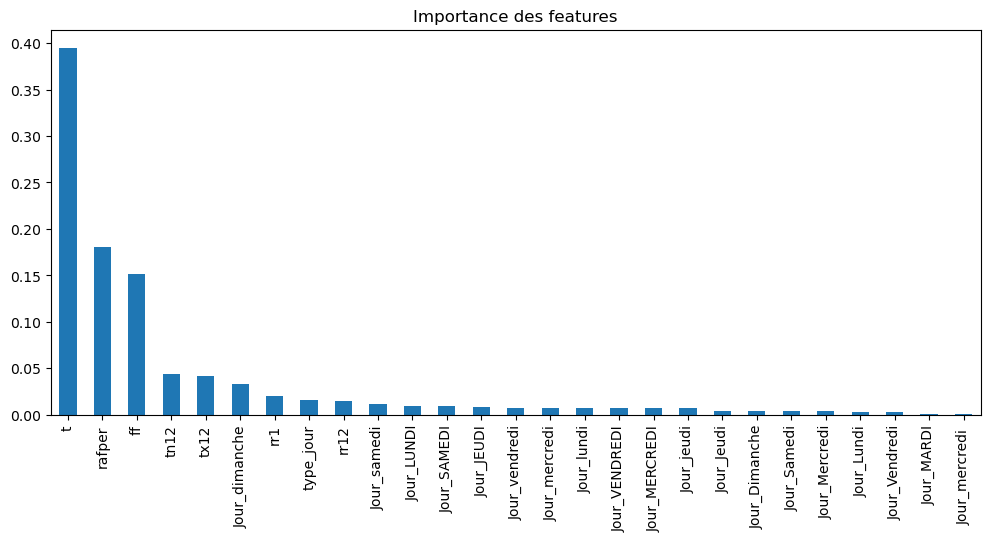

In [264]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score


features = ["ff", "t", "tn12", "tx12", "rafper",
            "rr1","rr12", "type_jour", "Jour"]

df = df_merged_feature.copy()
df = df.dropna(subset=["Fréquentation"])

X = df[features]
y = df["Fréquentation"]

encoder = OneHotEncoder(drop="first", sparse_output=False)
X_encoded = encoder.fit_transform(X[["Jour"]])
encoded_cols = encoder.get_feature_names_out(["Jour"])
X_encoded = pd.DataFrame(X_encoded, columns=encoded_cols, index=X.index)

X = X.drop(columns=["Jour"])
X = pd.concat([X, X_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.3f}")
print(f"R² : {r2:.3f}")

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind="bar", figsize=(12, 5), title="Importance des features")


In [265]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import numpy as np  # Ajouté car np.sqrt() est utilisé

df_merged_feature["date_dt"] = pd.to_datetime(df_merged_feature["date_dt"])  # Vérification

def assign_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return "printemps"
    elif month in [6, 7, 8]:
        return "été"
    elif month in [9, 10, 11]:
        return "automne"
    else:
        return "hiver"

# Gestion des features temporelles
df_merged_feature["year"] = df_merged_feature["date_dt"].dt.year
df_merged_feature["month"] = df_merged_feature["date_dt"].dt.month
df_merged_feature["day"] = df_merged_feature["date_dt"].dt.day
df_merged_feature["weekday"] = df_merged_feature["date_dt"].dt.weekday
df_merged_feature["is_weekend"] = df_merged_feature["weekday"].isin([5, 6]).astype(int)
df_merged_feature["saison"] = df_merged_feature["date_dt"].apply(assign_season)

# Conversion date_dt en timestamp et suppression
df_merged_feature["timestamp"] = df_merged_feature["date_dt"].astype(int) // 10**9
df_merged_feature = df_merged_feature.drop(columns=["date_dt"])

# One-Hot Encoding
df_merged_feature = pd.get_dummies(df_merged_feature, columns=["Jour", "saison"], drop_first=True)

# Définition des features et cible
X = df_merged_feature.drop(columns=["Fréquentation"])
y = df_merged_feature["Fréquentation"]

# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Tuning des hyperparamètres avec GridSearchCV
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6, 9],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1]
}

grid_search = GridSearchCV(xgb_model, param_grid, scoring="neg_mean_squared_error", cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Récupération du meilleur modèle entraîné
best_xgb = grid_search.best_estimator_

# Évaluation du modèle
y_pred = best_xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.3f}")
print(f"R² : {r2:.3f}")

# Vérification que le modèle est bien entraîné
if hasattr(best_xgb, "feature_importances_"):
    print("Le modèle a bien été entraîné avant la sauvegarde ✅")
else:
    print("Le modèle n'a PAS été entraîné ❌")

# Sauvegarde du bon modèle
joblib.dump(best_xgb, "xgb_model_musee.pkl")
print("Modèle sauvegardé avec succès ! ✅")


/var/folders/5w/x0658ths0qgg_mrds4w2c5qw0000gn/T/ipykernel_25355/731322430.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_feature["date_dt"] = pd.to_datetime(df_merged_feature["date_dt"])  # Vérification
/var/folders/5w/x0658ths0qgg_mrds4w2c5qw0000gn/T/ipykernel_25355/731322430.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_feature["year"] = df_merged_feature["date_dt"].dt.year
/var/folders/5w/x0658ths0qgg_mrds4w2c5qw0000gn/T/ipykernel_25355/731322430.py:22: SettingWithCopyWar

Fitting 3 folds for each of 36 candidates, totalling 108 fits
MSE : 15163.54
RMSE : 123.140
R² : 0.962
Le modèle a bien été entraîné avant la sauvegarde ✅
Modèle sauvegardé avec succès ! ✅


In [266]:
print(type(xgb_model))

# Charger le modèle pour test
xgb_model_musee = joblib.load("xgboost_musee.pkl")

# Vérifier si le modèle est bien chargé
try:
    print(xgb_model_musee)
    print("Le modèle est bien chargé et prêt à être utilisé ✅")
except Exception as e:
    print("Erreur lors du chargement :", e)



<class 'xgboost.sklearn.XGBRegressor'>
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Le modèle est bien chargé et prêt à être utilisé ✅


In [267]:
print(X.columns)

Index(['numer_sta', 'heure', 'ff', 't', 'tn12', 'tx12', 'rafper', 'rr1',
       'rr12', 'type_jour', 'year', 'month', 'day', 'weekday', 'is_weekend',
       'timestamp', 'Jour_Dimanche', 'Jour_JEUDI', 'Jour_Jeudi', 'Jour_LUNDI',
       'Jour_Lundi', 'Jour_MARDI', 'Jour_MERCREDI', 'Jour_Mercredi',
       'Jour_SAMEDI', 'Jour_Samedi', 'Jour_VENDREDI', 'Jour_Vendredi',
       'Jour_dimanche', 'Jour_jeudi', 'Jour_lundi', 'Jour_mercredi',
       'Jour_mercredi ', 'Jour_samedi', 'Jour_vendredi', 'saison_hiver',
       'saison_printemps', 'saison_été'],
      dtype='object')


In [268]:
df_merged_feature

,numer_sta,heure,ff,t,tn12,tx12,rafper,rr1,rr12,Fréquentation,...,Jour_dimanche,Jour_jeudi,Jour_lundi,Jour_mercredi,Jour_mercredi,Jour_samedi,Jour_vendredi,saison_hiver,saison_printemps,saison_été
0,7149,9.0,5.1,6.3,NaN,NaN,8.2,0.0,NaN,2150.0,...,True,False,False,False,False,False,False,True,False,False
1,7149,12.0,6.2,8.5,NaN,NaN,10.8,0.0,NaN,2150.0,...,True,False,False,False,False,False,False,True,False,False
2,7149,15.0,6.2,8.5,NaN,NaN,9.8,0.0,NaN,2150.0,...,True,False,False,False,False,False,False,True,False,False
3,7149,18.0,4.1,5.4,5.4,9.1,8.2,0.0,0.0,2150.0,...,True,False,False,False,False,False,False,True,False,False
4,7149,21.0,5.1,4.4,NaN,NaN,8.7,0.0,NaN,2150.0,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8553,7149,9.0,3.1,-0.6,NaN,NaN,4.1,0.0,NaN,507.0,...,False,False,True,False,False,False,False,False,False,False
8554,7149,12.0,1.0,0.3,NaN,NaN,5.1,0.0,NaN,507.0,...,False,False,True,False,False,False,False,False,False,False
8555,7149,15.0,2.1,0.4,NaN,NaN,4.1,0.0,NaN,507.0,...,False,False,True,False,False,False,False,False,False,False
8556,7149,18.0,1.5,-1.2,-1.2,1.7,5.1,0.0,0.0,507.0,...,False,False,True,False,False,False,False,False,False,False


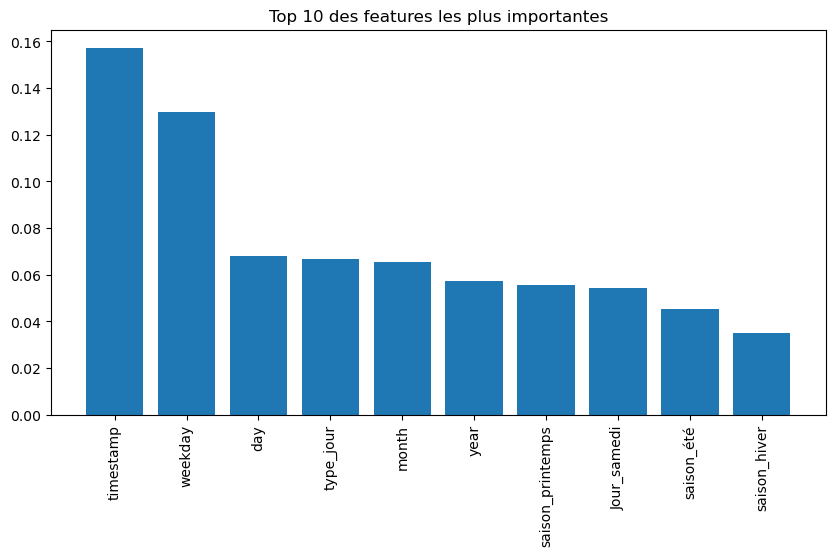

In [269]:
feature_importance = best_xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

top_n = 10
top_features = sorted_idx[:top_n]

plt.figure(figsize=(10, 5))
plt.bar(range(top_n), feature_importance[top_features], align="center")
plt.xticks(range(top_n), X_train.columns[top_features], rotation=90)
plt.title("Top 10 des features les plus importantes")
plt.show()

-
-
-
-
-
-
-
-
PREVISION FREQUENTATION

-
-
-
-
-
-
-
-

**API REQUEST**

In [270]:
import requests

# Token d'authentification
token = 'dffe01e3ff3bd762ba2640d78f579091dbb60d9f104c2d1f4c72a0c006b318fc'

# URL de l'API Météo Concept pour Paris (75056)
url = f'http://api.meteo-concept.com/api/forecast/daily?token={token}&insee=94054'

response = requests.get(url)
data = response.json()

# Vérifier si la clé "forecast" est présente dans les données
if "forecast" in data:
    prev_meteo = data["forecast"]
    df_prev_meteo = pd.DataFrame(prev_meteo)
    df_prev_meteo.to_csv("previsions_meteo.csv", index=False, encoding="utf-8")
    
    print(df_prev_meteo.head(20))


    insee     cp  latitude  longitude  day                  datetime  wind10m  \
0   91027  91200   48.7092     2.3866    0  2025-03-07T01:00:00+0100       10   
1   91027  91200   48.7092     2.3866    1  2025-03-08T01:00:00+0100       10   
2   91027  91200   48.7092     2.3866    2  2025-03-09T01:00:00+0100       15   
3   91027  91200   48.7092     2.3866    3  2025-03-10T01:00:00+0100       10   
4   91027  91200   48.7092     2.3866    4  2025-03-11T01:00:00+0100       10   
5   91027  91200   48.7092     2.3866    5  2025-03-12T01:00:00+0100       15   
6   91027  91200   48.7092     2.3866    6  2025-03-13T01:00:00+0100       15   
7   91027  91200   48.7092     2.3866    7  2025-03-14T01:00:00+0100       15   
8   91027  91200   48.7092     2.3866    8  2025-03-15T01:00:00+0100       15   
9   91027  91200   48.7092     2.3866    9  2025-03-16T01:00:00+0100       15   
10  91027  91200   48.7092     2.3866   10  2025-03-17T01:00:00+0100       15   
11  91027  91200   48.7092  

In [271]:
df_prev_meteo = df_prev_meteo.drop(columns=["insee","cp","latitude","longitude","dirwind10m",
                            "weather","sun_hours","etp","probafrost","probafog",
                            "probawind70","probawind100","gustx","probarain"])
df_prev_meteo

,day,datetime,wind10m,gust10m,rr10,rr1,tmin,tmax
0,0,2025-03-07T01:00:00+0100,10,35,0.0,0.0,6,17
1,1,2025-03-08T01:00:00+0100,10,38,0.0,0.0,8,18
2,2,2025-03-09T01:00:00+0100,15,28,1.4,1.7,11,18
3,3,2025-03-10T01:00:00+0100,10,23,5.1,7.9,9,13
4,4,2025-03-11T01:00:00+0100,10,24,1.8,9.4,6,11
5,5,2025-03-12T01:00:00+0100,15,23,2.9,4.7,4,8
6,6,2025-03-13T01:00:00+0100,15,24,2.1,2.1,2,8
7,7,2025-03-14T01:00:00+0100,15,27,0.9,0.9,2,9
8,8,2025-03-15T01:00:00+0100,15,23,0.2,2.0,2,10
9,9,2025-03-16T01:00:00+0100,15,27,1.6,7.2,3,10


In [272]:
for wind in ["wind10m", "gust10m"]:
    df_prev_meteo[wind] = pd.to_numeric(df_prev_meteo[wind], errors="coerce")
    df_prev_meteo[wind] = df_prev_meteo[wind].apply(lambda x: x/3.6).round(2)

df_prev_meteo["t"] = (df_prev_meteo["tmin"] + df_prev_meteo["tmax"]) / 2

In [273]:
df_prev_meteo.dtypes

day           int64
datetime     object
wind10m     float64
gust10m     float64
rr10        float64
rr1         float64
tmin          int64
tmax          int64
t           float64
dtype: object

In [274]:
df_ferie["date_ferie"] = pd.to_datetime(df_ferie["date_ferie"])
df_prev_meteo["datetime"] = pd.to_datetime(df_prev_meteo["datetime"]).dt.tz_localize(None)

df_prev_meteo_feature = df_prev_meteo.merge(df_ferie, left_on="datetime", right_on="date_ferie", how="left")
df_prev_meteo_feature.drop(columns=["day","Date", "zone", "annee"], inplace=True, errors="ignore")

df_prev_meteo_feature["datetime"] = pd.to_datetime(df_prev_meteo["datetime"])
df_prev_meteo_feature["datetime"] = df_prev_meteo["datetime"].dt.tz_localize(None)

# Ajouter la colonne Jour
df_prev_meteo_feature["Jour"] = df_prev_meteo_feature["datetime"].dt.day_name()

df_prev_meteo_feature.insert(0, "numer_sta", 7149)
df_prev_meteo_feature.insert(2, "heure", 9.0)
df_prev_meteo_feature.rename(columns={"datetime": "date_dt"}, inplace=True)
df_prev_meteo_feature.rename(columns={"rr10": "rr12"}, inplace=True)
df_prev_meteo_feature.rename(columns={"wind10m": "ff"}, inplace=True)
df_prev_meteo_feature.rename(columns={"gust10m": "rafper"}, inplace=True)
df_prev_meteo_feature.rename(columns={"tmin": "tn12"}, inplace=True)
df_prev_meteo_feature.rename(columns={"tmax": "tx12"}, inplace=True)

df_prev_meteo_feature.rename(columns=lambda x: x.strip(), inplace=True)  # Preventing any synthax naming error

# Ajouter la colonne type_jour (1 si férié ou week-end, sinon 0)
weekend_days = ["Saturday", "Sunday"]
df_prev_meteo_feature["type_jour"] = np.where(
    (df_prev_meteo_feature["nom_jour_ferie"].notna()) | 
    (df_prev_meteo_feature["Jour"].isin(weekend_days)), 
    1, 0
)


# Supprimer les colonnes fériées si elles ne sont plus utiles
df_prev_meteo_feature.drop(columns=["date_ferie", "nom_jour_ferie"], inplace=True, errors="ignore")

#Agencement des colonnes pour xgboost
nouvel_ordre = ["numer_sta","date_dt","heure","ff","t","tn12","tx12","rafper","rr1","rr12","Jour","type_jour"]
df_prev_meteo_feature = df_prev_meteo_feature[nouvel_ordre]

df_prev_meteo_feature


,numer_sta,date_dt,heure,ff,t,tn12,tx12,rafper,rr1,rr12,Jour,type_jour
0,7149,2025-03-07 01:00:00,9.0,2.78,11.5,6,17,9.72,0.0,0.0,Friday,0
1,7149,2025-03-08 01:00:00,9.0,2.78,13.0,8,18,10.56,0.0,0.0,Saturday,1
2,7149,2025-03-09 01:00:00,9.0,4.17,14.5,11,18,7.78,1.7,1.4,Sunday,1
3,7149,2025-03-10 01:00:00,9.0,2.78,11.0,9,13,6.39,7.9,5.1,Monday,0
4,7149,2025-03-11 01:00:00,9.0,2.78,8.5,6,11,6.67,9.4,1.8,Tuesday,0
5,7149,2025-03-12 01:00:00,9.0,4.17,6.0,4,8,6.39,4.7,2.9,Wednesday,0
6,7149,2025-03-13 01:00:00,9.0,4.17,5.0,2,8,6.67,2.1,2.1,Thursday,0
7,7149,2025-03-14 01:00:00,9.0,4.17,5.5,2,9,7.50,0.9,0.9,Friday,0
8,7149,2025-03-15 01:00:00,9.0,4.17,6.0,2,10,6.39,2.0,0.2,Saturday,1
9,7149,2025-03-16 01:00:00,9.0,4.17,6.5,3,10,7.50,7.2,1.6,Sunday,1


In [275]:
df_prev_meteo_feature.dtypes

numer_sta             int64
date_dt      datetime64[ns]
heure               float64
ff                  float64
t                   float64
tn12                  int64
tx12                  int64
rafper              float64
rr1                 float64
rr12                float64
Jour                 object
type_jour             int64
dtype: object

**PREDICTION**

In [276]:
'''import joblib
import pandas as pd

# Charger le modèle XGBoost préalablement entraîné
xgb_model_musee = joblib.load("xgb_model_musee.pkl")

# S'assurer que la colonne date est bien au format datetime
df_prev_meteo_feature["date_dt"] = pd.to_datetime(df_prev_meteo_feature["date_dt"])

# Fonction pour assigner la saison
def assign_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return "printemps"
    elif month in [6, 7, 8]:
        return "été"
    elif month in [9, 10, 11]:
        return "automne"
    else:
        return "hiver"

# Transformation des dates
df_prev_meteo_feature["year"] = df_prev_meteo_feature["date_dt"].dt.year
df_prev_meteo_feature["month"] = df_prev_meteo_feature["date_dt"].dt.month
df_prev_meteo_feature["day"] = df_prev_meteo_feature["date_dt"].dt.day
df_prev_meteo_feature["weekday"] = df_prev_meteo_feature["date_dt"].dt.weekday
df_prev_meteo_feature["is_weekend"] = df_prev_meteo_feature["weekday"].isin([5, 6]).astype(int)
df_prev_meteo_feature["saison"] = df_prev_meteo_feature["date_dt"].apply(assign_season)

# Conversion en timestamp
df_prev_meteo_feature["timestamp"] = df_prev_meteo_feature["date_dt"].view("int64") // 10**9

# Suppression de la colonne date originale après conversion
df_prev_meteo_feature = df_prev_meteo_feature.drop(columns=["date_dt"])

# Nettoyage des noms des jours avant One-Hot Encoding
if "Jour" in df_prev_meteo_feature.columns:
    df_prev_meteo_feature["Jour"] = df_prev_meteo_feature["Jour"].str.strip().str.lower()

# Vérifier que "Jour" existe avant de l'encoder
cols_to_encode = ["saison"]
if "Jour" in df_prev_meteo_feature.columns:
    cols_to_encode.append("Jour")

# Appliquer One-Hot Encoding
df_prev_meteo_feature = pd.get_dummies(df_prev_meteo_feature, columns=cols_to_encode, drop_first=True)

# Liste des colonnes attendues par le modèle
features_model = [
    "numer_sta", "heure", "ff", "t", "tn12", "tx12", "rafper", "rr1", "rr12",
    "type_jour", "weekday", "is_weekend", "year", "month", "day", "timestamp",
    "saison_automne", "saison_hiver", "saison_printemps"
]

# Ajouter les colonnes manquantes avec valeur par défaut 0
for col in features_model:
    if col not in df_prev_meteo_feature.columns:
        df_prev_meteo_feature[col] = 0  

# Supprimer les colonnes non attendues
df_prev_meteo_feature = df_prev_meteo_feature[features_model]

# Vérifier la présence de `saison_automne`
if "saison_automne" not in df_prev_meteo_feature.columns:
    df_prev_meteo_feature["saison_automne"] = 0

# Supprimer `saison_été` si elle n'était pas prévue à l'entraînement
if "saison_été" in df_prev_meteo_feature.columns:
    df_prev_meteo_feature.drop(columns=["saison_été"], inplace=True)

# Sélection des features finales
df_prev = df_prev_meteo_feature.copy()

# Conversion des types en float pour éviter les erreurs de XGBoost
df_prev = df_prev.astype(float)

# Prédiction avec le modèle
df_prev["Frequentation_predite"] = xgb_model_musee.predict(df_prev)

# Ajouter la colonne date pour suivre les résultats
df_prev["date"] = df_prev_meteo_feature.index  # Utiliser l'index si date supprimée

# Affichage des résultats
print(df_prev[["date", "Frequentation_predite"]])'''


'import joblib\nimport pandas as pd\n\n# Charger le modèle XGBoost préalablement entraîné\nxgb_model_musee = joblib.load("xgb_model_musee.pkl")\n\n# S\'assurer que la colonne date est bien au format datetime\ndf_prev_meteo_feature["date_dt"] = pd.to_datetime(df_prev_meteo_feature["date_dt"])\n\n# Fonction pour assigner la saison\ndef assign_season(date):\n    month = date.month\n    if month in [3, 4, 5]:\n        return "printemps"\n    elif month in [6, 7, 8]:\n        return "été"\n    elif month in [9, 10, 11]:\n        return "automne"\n    else:\n        return "hiver"\n\n# Transformation des dates\ndf_prev_meteo_feature["year"] = df_prev_meteo_feature["date_dt"].dt.year\ndf_prev_meteo_feature["month"] = df_prev_meteo_feature["date_dt"].dt.month\ndf_prev_meteo_feature["day"] = df_prev_meteo_feature["date_dt"].dt.day\ndf_prev_meteo_feature["weekday"] = df_prev_meteo_feature["date_dt"].dt.weekday\ndf_prev_meteo_feature["is_weekend"] = df_prev_meteo_feature["weekday"].isin([5, 6]).a

-
-
-
-
-
-

In [277]:
import joblib
import pandas as pd

# Charger le modèle XGBoost préalablement entraîné
xgb_model_musee = joblib.load("xgb_model_musee.pkl")

# Fonction pour assigner la saison
def assign_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return "printemps"
    elif month in [6, 7, 8]:
        return "été"
    elif month in [9, 10, 11]:
        return "automne"
    else:
        return "hiver"

# Transformation des dates
df_prev_meteo_feature["year"] = df_prev_meteo_feature["date_dt"].dt.year
df_prev_meteo_feature["month"] = df_prev_meteo_feature["date_dt"].dt.month
df_prev_meteo_feature["day"] = df_prev_meteo_feature["date_dt"].dt.day
df_prev_meteo_feature["weekday"] = df_prev_meteo_feature["date_dt"].dt.weekday
df_prev_meteo_feature["is_weekend"] = df_prev_meteo_feature["weekday"].isin([5, 6]).astype(int)
df_prev_meteo_feature["saison"] = df_prev_meteo_feature["date_dt"].apply(assign_season)

df_prev_meteo_feature["timestamp"] = df_prev_meteo_feature["date_dt"].astype(int) // 10**9
df_prev_meteo_feature = df_prev_meteo_feature.drop(columns=["date_dt"])

# Vérifier et uniformiser les noms de la colonne "Jour"
if "Jour" in df_prev_meteo_feature.columns:
    df_prev_meteo_feature["Jour"] = df_prev_meteo_feature["Jour"].str.strip().str.lower().str.capitalize()

# Appliquer One-Hot Encoding proprement
cols_to_encode = ["saison"]
if "Jour" in df_prev_meteo_feature.columns:
    cols_to_encode.append("Jour")

df_prev_meteo_feature = pd.get_dummies(df_prev_meteo_feature, columns=cols_to_encode, drop_first=True)

# Récupérer les colonnes utilisées pendant l'entraînement
expected_features = xgb_model_musee.feature_names_in_

# Identifier les colonnes manquantes et en trop
missing_cols = set(expected_features) - set(df_prev_meteo_feature.columns)
extra_cols = set(df_prev_meteo_feature.columns) - set(expected_features)

# Ajouter les colonnes manquantes avec une valeur par défaut de 0
for col in missing_cols:
    df_prev_meteo_feature[col] = 0

# Supprimer les colonnes non attendues par le modèle
df_prev_meteo_feature.drop(columns=extra_cols, errors="ignore", inplace=True)

# Réorganiser les colonnes dans le bon ordre
df_prev_meteo_feature = df_prev_meteo_feature[expected_features]

# Convertir toutes les colonnes en float pour éviter les erreurs
df_prev_meteo_feature = df_prev_meteo_feature.astype(float)

# Prédire la fréquentation
df_prev_meteo_feature["Frequentation_predite"] = xgb_model_musee.predict(df_prev_meteo_feature).round()

# Ajouter la colonne date pour suivre les résultats
df_prev_meteo_feature["date"] = df_prev_meteo_feature.index

# Afficher les résultats (date et fréquentation prédite)
print(df_prev_meteo_feature[["date", "Frequentation_predite"]])


    date  Frequentation_predite
0      0                  812.0
1      1                 1011.0
2      2                 1231.0
3      3                  647.0
4      4                  599.0
5      5                  660.0
6      6                  689.0
7      7                  703.0
8      8                  725.0
9      9                 1356.0
10    10                  605.0
11    11                  610.0
12    12                  621.0
13    13                  589.0


In [278]:
df_prev_meteo_feature.to_csv("predictions_frequentation.csv", index=False)